In [6]:
#Import packages
import pandas as pd
import numpy as np
import os

from functions import plotting_raw_data, remove_outliers, error_plot, plot_cpt_data, plot_cpt_data_ML_prediction, plot_cpt_data_NW_site

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
file_path = r"C:\Users\haris\Documents\GitHub\ISC7_DataDrivenSiteCharacterization\data\BBC\Sand\CPT\OYSC35.xlsx"
#file_path = r"C:\Users\haris\Documents\GitHub\DATA-DRIVEN-SITE-CHARACTERIZATION\BBC\Clay\ONSC23.xlsx"

#select desired columns as for the model training
selected_columns_x = ['Depth (m)','qc (MPa)', 'fs (kPa)','Rf (%)','Vs (m/s)'] #for Machine learning features
plot_columns_x_label = ['Depth (m)','$q_c$ (MPa)', '$f_s$ (kPa)','$R_f$ (%)', '$v_s$ (m/s)'] #for plotting purpose

# Read the Excel file into a DataFrame
df_test_norwegen = pd.read_excel(file_path)
df_test_norwegen.drop(index=df_test_norwegen.index[:2], axis=0, inplace=True)
df_test_norwegen = df_test_norwegen.astype(float)

# data preprocessing
data_preproccesed = df_test_norwegen[['Depth', 'Tip resistance', 'Sleeve friction']]
data_preproccesed['Rf (%)'] = df_test_norwegen['Sleeve friction'].values / (df_test_norwegen['Tip resistance'].values * 1000) * 100
data_preproccesed['Shear wave'] = df_test_norwegen['Shear wave']
data_preproccesed = data_preproccesed.astype(float)


column_mapping = {
    'Depth': 'Depth (m)',
    'Tip resistance': 'qc (MPa)',
    'Sleeve friction': 'fs (kPa)',
    'Rf (%)': 'Rf (%)',
    'Shear wave': 'Vs (m/s)'
}

# Rename columns in x_data_nor
data_preproccesed = data_preproccesed.rename(columns=column_mapping)
df_test_norwegen_raw = data_preproccesed.copy()

#
for column in data_preproccesed.columns[:-1]:
    data_preproccesed[column] = data_preproccesed[column].rolling(window=50).mean()

data_preproccesed_dropped = data_preproccesed.dropna(subset=['Vs (m/s)'])

x_data_nor = data_preproccesed_dropped[selected_columns_x[:-1]]
y_data_nor = data_preproccesed_dropped['Vs (m/s)']

C:\Users\haris\AppData\Local\Temp\ipykernel_23996\3771724155.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_preproccesed['Rf (%)'] = df_test_norwegen['Sleeve friction'].values / (df_test_norwegen['Tip resistance'].values * 1000) * 100
C:\Users\haris\AppData\Local\Temp\ipykernel_23996\3771724155.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_preproccesed['Shear wave'] = df_test_norwegen['Shear wave']


In [8]:
import joblib

# Load the model
loaded_model = joblib.load('xgb_model.joblib')

In [11]:
# Check performance on Norwegian data
y_pred = loaded_model.predict(x_data_nor)
# Calculate the R-squared score, Mean squared error
score = r2_score(y_data_nor, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_data_nor, y_pred)
print(f'Norwegian test data - R2: {round(score, 3)}, MSE: {round(mse, 3)}.')

TypeError: type numpy.ndarray doesn't define __round__ method

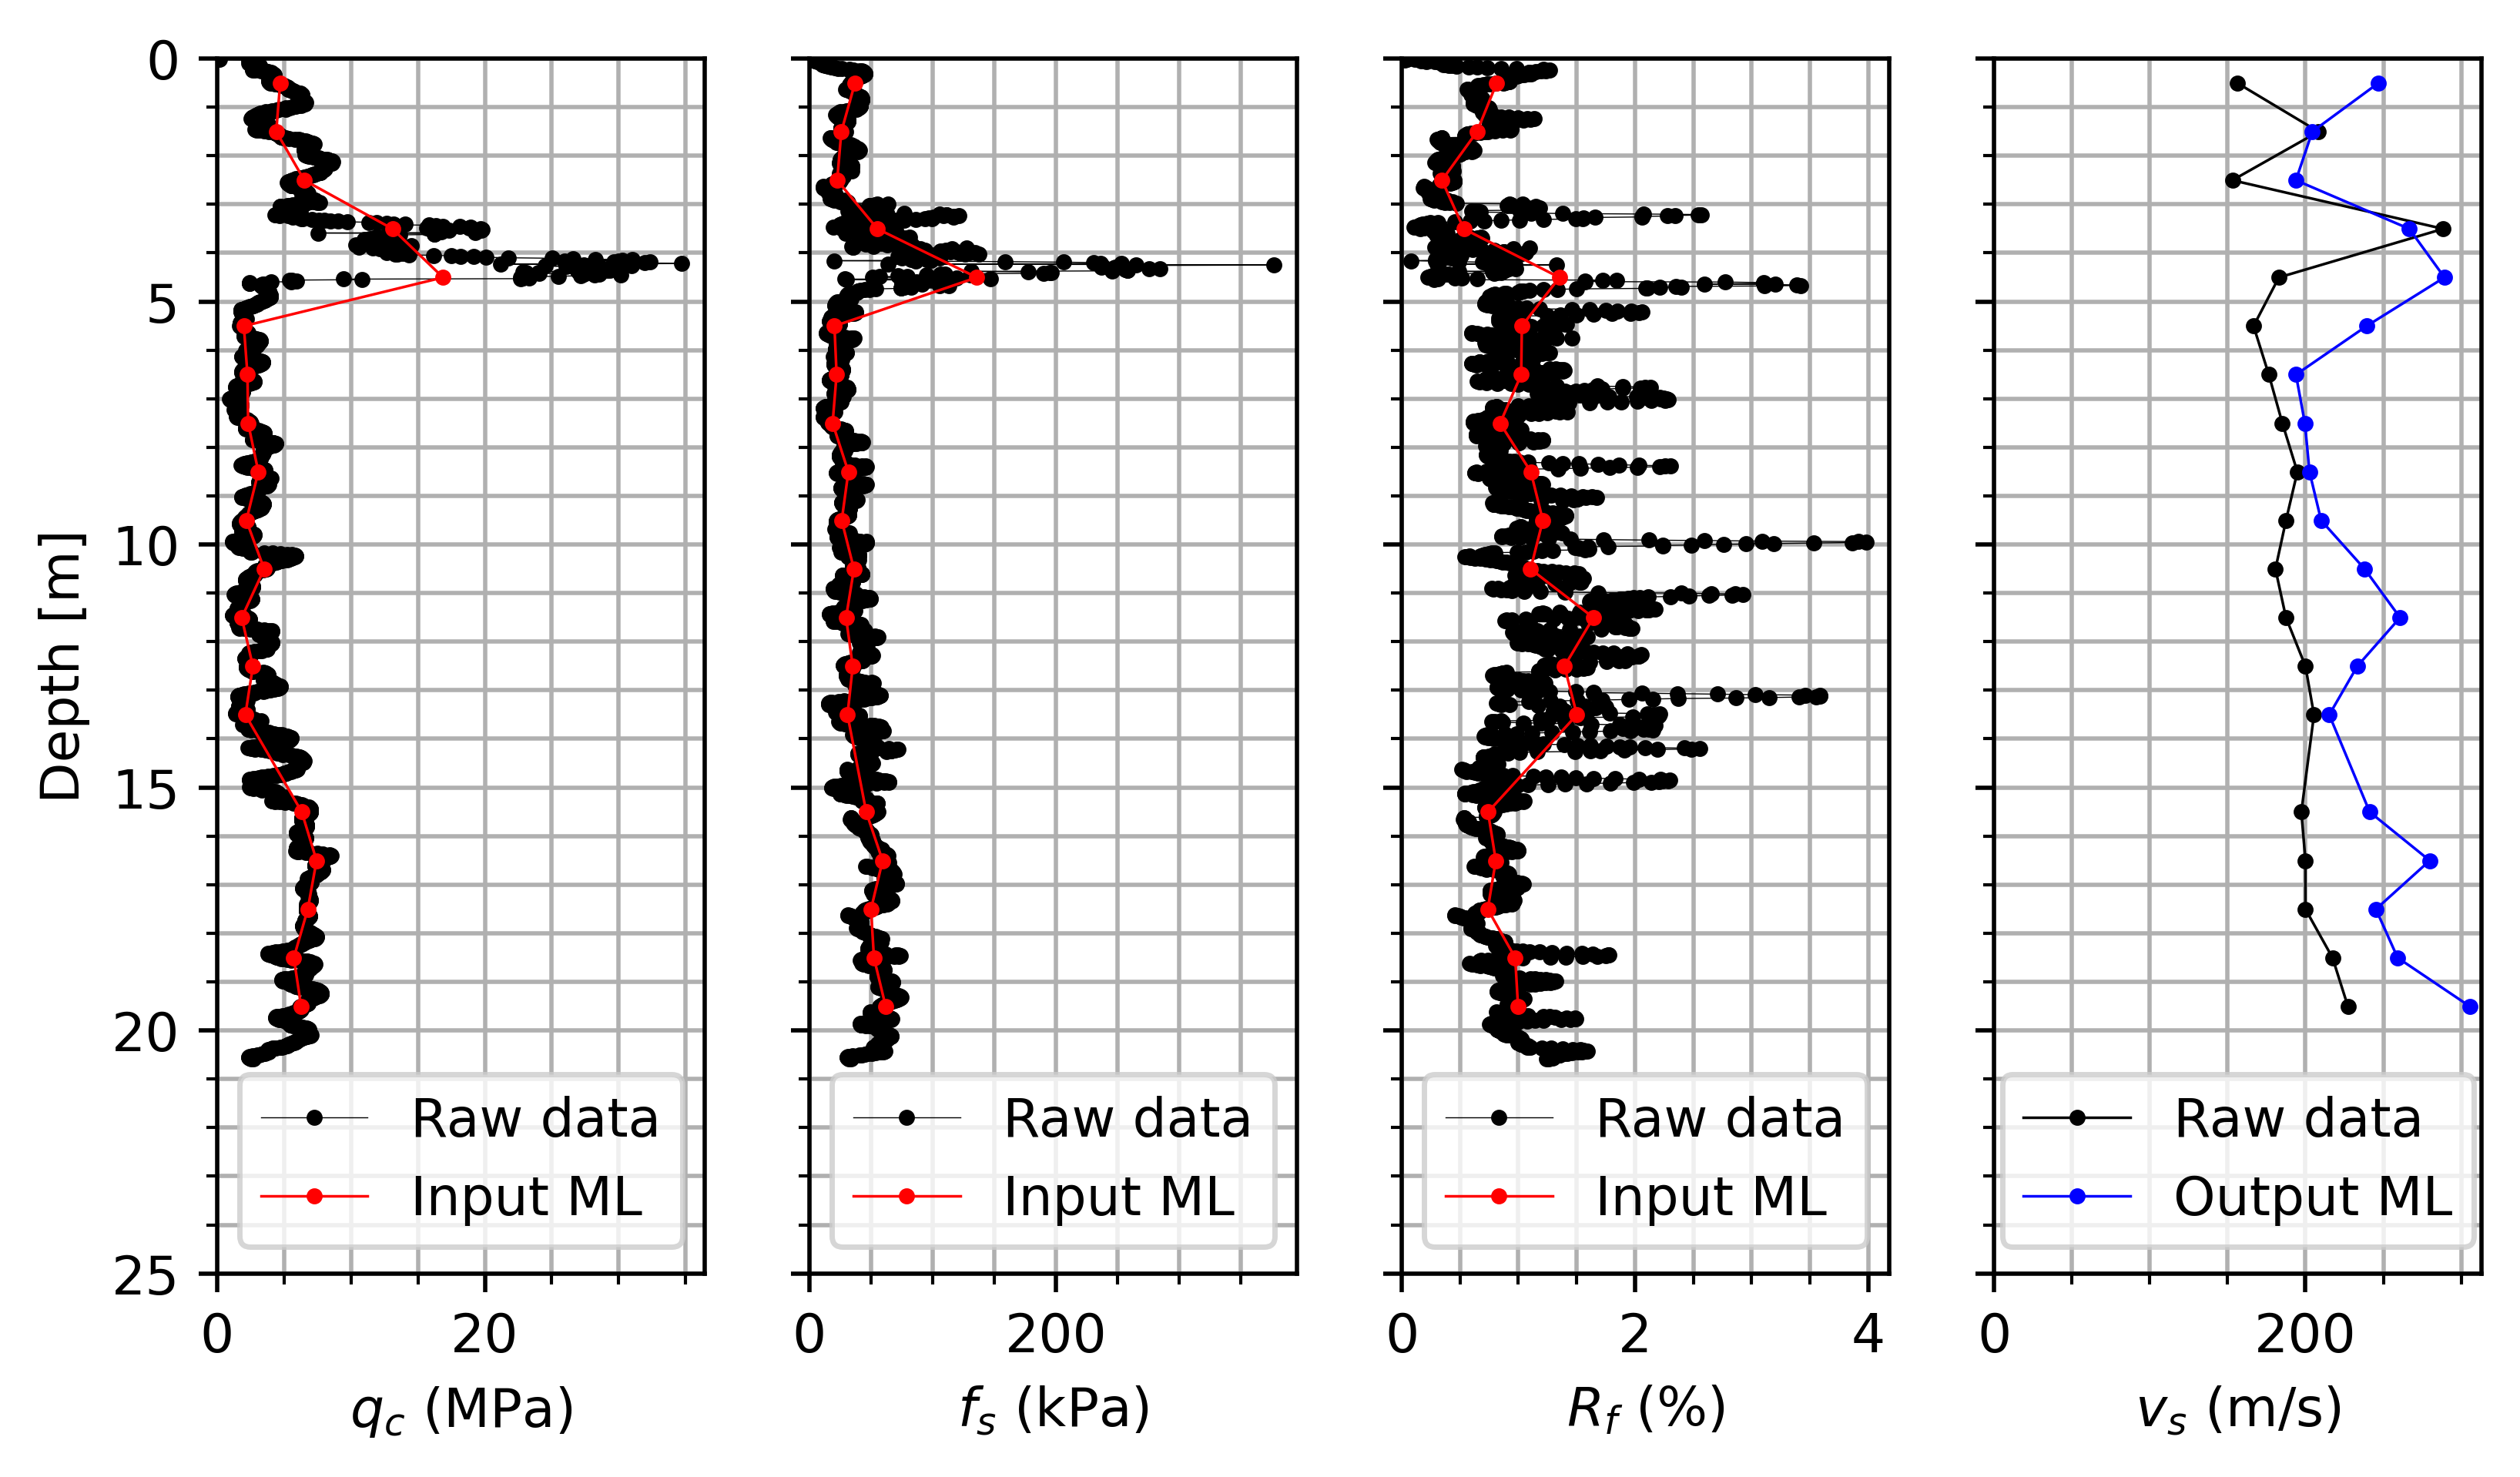

In [10]:
cm = 1/2.54  # centimeters in inches
plot_cpt_data_NW_site((17*cm, 10*cm), selected_columns_x, df_test_norwegen_raw, data_preproccesed, data_preproccesed_dropped, y_data_nor, y_pred, plot_columns_x_label)
plt.savefig("Norwegian_test_site_XGBRegressor.png", dpi = 700)